In [155]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2 as cv

print(tf.__version__)


2.7.0


In [156]:
datasetfilename = 'saseendataset.npz'

with np.load(datasetfilename, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabel = data['labels']
    dataLabelNames = data['labelnames']

print(dataImages.shape)
print(dataLabel.shape)
print(dataLabelNames.shape)

(24,)
(24,)
(24,)


In [157]:
dataImages.dtype, dataLabel.dtype, dataLabelNames.dtype

(dtype('O'), dtype('int32'), dtype('<U10'))

In [158]:
print(len(dataLabel))
print(dataLabel)
print(dataLabelNames)

24
[5 0 1 2 3 4 6 7 8 0 1 3 4 6 7 5 0 1 2 3 4 6 7 8]
['JC' 'afiq' 'azureen' 'gavin' 'goke' 'inamul' 'mahmuda' 'numan'
 'saseendran' 'afiq' 'azureen' 'goke' 'inamul' 'mahmuda' 'numan' 'JC'
 'afiq' 'azureen' 'gavin' 'goke' 'inamul' 'mahmuda' 'numan' 'saseendran']


In [159]:
classNames = sorted(np.unique(dataLabelNames))
classLabels = sorted(np.unique(dataLabel))

print(classNames)
print(classLabels)

['JC', 'afiq', 'azureen', 'gavin', 'goke', 'inamul', 'mahmuda', 'numan', 'saseendran']
[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [160]:
# Resize the images to be all in same size

import cv2 as cv

N = len(dataImages)
shape = (N, 200,200,3)

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)
    
print(dataImages.dtype, y.dtype, y.shape)

dataImages = y

object uint8 (24, 200, 200, 3)


In [161]:
dataLabel = dataLabel.astype('uint8')
dataLabel.dtype

dtype('uint8')

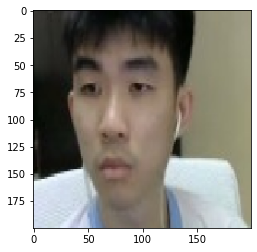

In [162]:
plt.imshow(dataImages[0][:,:,::-1])

In [163]:
imgGray = []

for i in range(len(dataImages)):    
    gray = cv.cvtColor(dataImages[i], cv.COLOR_BGR2GRAY)
    imgGray.append(gray)
    
grayImages = np.array(imgGray)

print(grayImages.shape)
dataImages = grayImages.copy()




(24, 200, 200)


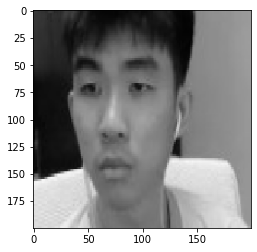

In [164]:
plt.imshow(cv.cvtColor(dataImages[0], cv.COLOR_GRAY2RGB))

In [165]:
# Split the data to train and test
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabel, test_size=0.3, random_state=50)

print(dataImages.shape)
print(dataLabel)

print(trainImages.shape)
print(testImages.shape)
print(testLabels)

(24, 200, 200)
[5 0 1 2 3 4 6 7 8 0 1 3 4 6 7 5 0 1 2 3 4 6 7 8]
(16, 200, 200)
(8, 200, 200)
[3 7 4 6 0 8 2 7]


In [166]:
classNames = sorted(np.unique(dataLabelNames))
dataLabel[0]

5

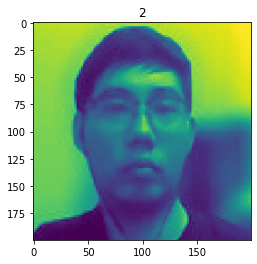

In [167]:
plt.figure()

i = 0
plt.imshow(trainImages[i])
plt.title(f'{trainLabels[i]}')
# plt.xlabel(classNames[dataLabel[i]])
plt.show()

In [168]:
import numpy as np

print(trainImages[0].shape)
print(trainImages[1].shape)

(200, 200)
(200, 200)


In [169]:
for i in range(len(trainImages)):
    trainImages[i] = cv.resize(trainImages[i], [200,200], interpolation=cv.INTER_NEAREST)


In [170]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

print(inputShape, outputShape)

(200, 200) 9


In [171]:
trainImages = trainImages / 255
testImages = testImages / 255

In [172]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Softmax(),
    tf.keras.layers.Dense(outputShape)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 40000)             0         
                                                                 
 dense_20 (Dense)            (None, 128)               5120128   
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 5,154,313
Trainable params: 5,154,313
Non-trainable params: 0
_________________________________________________________________


In [173]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [174]:
model.fit(trainImages, trainLabels, epochs=25)

Epoch 1/25
1/1 [==============================] - 1s 533ms/step - loss: 2.1873 - accuracy: 0.0625
Epoch 2/25
1/1 [==============================] - 0s 26ms/step - loss: 5.9117 - accuracy: 0.1250
Epoch 3/25
1/1 [==============================] - 0s 24ms/step - loss: 12.9252 - accuracy: 0.1250
Epoch 4/25
1/1 [==============================] - 0s 25ms/step - loss: 7.4853 - accuracy: 0.3750
Epoch 5/25
1/1 [==============================] - 0s 25ms/step - loss: 5.7273 - accuracy: 0.2500
Epoch 6/25
1/1 [==============================] - 0s 27ms/step - loss: 6.8092 - accuracy: 0.1875
Epoch 7/25
1/1 [==============================] - 0s 26ms/step - loss: 5.2709 - accuracy: 0.3750
Epoch 8/25
1/1 [==============================] - 0s 24ms/step - loss: 5.0147 - accuracy: 0.2500
Epoch 9/25
1/1 [==============================] - 0s 26ms/step - loss: 4.8116 - accuracy: 0.2500
Epoch 10/25
1/1 [==============================] - 0s 25ms/step - loss: 2.9044 - accuracy: 0.3750
Epoch 11/25
1/1 [==========

In [175]:
testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=2)

print('\nTest accuracy:', testAcc)

1/1 - 0s - loss: 1.0018 - accuracy: 0.6250 - 131ms/epoch - 131ms/step

Test accuracy: 0.625


In [176]:
predictions = model.predict(testImages)
predictions[0]

array([-3.3257515, -1.3320782,  1.4855703,  5.4063706, -6.182467 ,
       -9.884439 , -5.2568507,  4.625184 , -3.4826233], dtype=float32)

3 3 True
7 7 True
5 4 False
6 6 True
7 0 False
8 8 True
2 2 True
0 7 False
{0: 'JC', 1: 'afiq', 2: 'azureen', 3: 'gavin', 4: 'goke', 5: 'inamul', 6: 'mahmuda', 7: 'numan', 8: 'saseendran'}


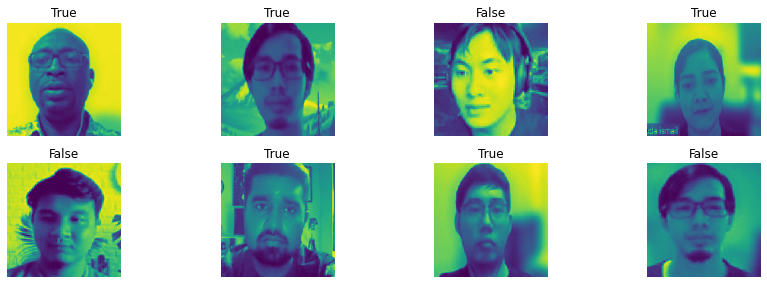

In [177]:
ix_names = dict(zip(classLabels, classNames))

a,b = 3,4
count = 1
plt.figure(figsize=(12,6))

for i in range(len(testImages)):
    predictedLabel = np.argmax(predictions[i])
    print(predictedLabel, testLabels[i], predictedLabel == testLabels[i])
    
    plt.subplot(a,b,count)
    plt.imshow(testImages[i])
    plt.axis('off') 
    plt.title(predictedLabel == testLabels[i])
    count+=1
    
print(ix_names)
plt.tight_layout()
plt.show()